FINDING DONORS FOR CHARITY

In this project, you will apply supervised learning techniques and an analytical mind on data collected for the U.S. census to help CharityML (a fictitious charity organization) identify people most likely to donate to their cause. You will first explore the data to learn how the census data is recorded. Next, you will apply a series of transformations and preprocessing techniques to manipulate the data into a workable format. You will then evaluate several supervised learners of your choice on the data, and consider which is best suited for the solution. Afterwards, you will optimize the model you've selected and present it as your solution to CharityML. Finally, you will explore the chosen model and its predictions under the hood, to see just how well it's performing when considering the data it's given.

Project Highlights
This project is designed to get you acquainted with the many supervised learning algorithms available in sklearn, and to also provide for a method of evaluating just how each model works and performs on a certain type of data. It is important in machine learning to understand exactly when and where a certain algorithm should be used, and when one should be avoided.

Things you will learn by completing this project:

- How to identify when preprocessing is needed, and how to apply it.
- How to establish a benchmark for a solution to the problem.
- What each of several supervised learning algorithms accomplishes given a specific dataset.
- How to investigate whether a candidate solution model is adequate for the problem.

Description

CharityML is a fictitious charity organization located in the heart of Silicon Valley that was established to provide financial support for people eager to learn machine learning. After nearly 32,000 letters sent to people in the community, CharityML determined that every donation they received came from someone that was making more than $50,000 annually. To expand their potential donor base, CharityML has decided to send letters to residents of California, but to only those most likely to donate to the charity. With nearly 15 million working Californians, CharityML has brought you on board to help build an algorithm to best identify potential donors and reduce overhead cost of sending mail. Your goal will be evaluate and optimize several different supervised learners to determine which algorithm will provide the highest donation yield while also reducing the total number of letters being sent.

IMPORTING LIBRARIES

In [337]:
import pandas as pd
import seaborn as sns
from numpy import random
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
IMPORTING THE DATASET

In [338]:
np.random.seed(42)
df=pd.read_csv("census.csv")
df = df.reindex(np.random.permutation(df.index))
df.reset_index(inplace=True, drop=True) # Reset index
df.head(5)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,28,Private,Masters,14.0,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,45.0,France,>50K
1,60,Private,9th,5.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,45.0,United-States,<=50K
2,43,Private,Some-college,10.0,Never-married,Adm-clerical,Not-in-family,White,Male,0.0,1669.0,45.0,United-States,<=50K
3,35,State-gov,HS-grad,9.0,Married-civ-spouse,Other-service,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
4,36,Private,Some-college,10.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States,>50K


In [339]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
X.head()


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,28,Private,Masters,14.0,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,45.0,France
1,60,Private,9th,5.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,45.0,United-States
2,43,Private,Some-college,10.0,Never-married,Adm-clerical,Not-in-family,White,Male,0.0,1669.0,45.0,United-States
3,35,State-gov,HS-grad,9.0,Married-civ-spouse,Other-service,Husband,White,Male,0.0,0.0,40.0,United-States
4,36,Private,Some-college,10.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States


In [340]:
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


Data Exploration conclusions:
    - There are no missing values
    - The total count of values is 45222

In [341]:
df.groupby(by='income').count()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
income,,,,,,,,,,,,,
<=50K,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014
>50K,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208


Discussion:
    
- Number of individuals with income >$50,000 - 11208

- Number of individuals with income <=$50,000 - 34014

- Percentage of individuals with income > $50,000 - 25%

SPLITTING DATA INTO TRAIN AND TEST

Its important to split the data at the beginning to avoid any data leakage

In [342]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X,Y, test_size = 0.15)

EXPLORING THE DATASET

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14d8a88e0>,
      dtype=object)

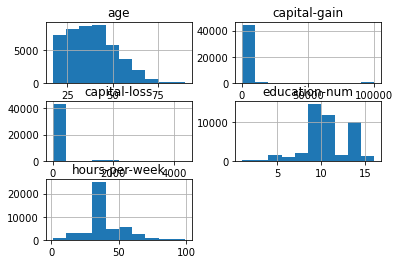

In [343]:
X.hist()

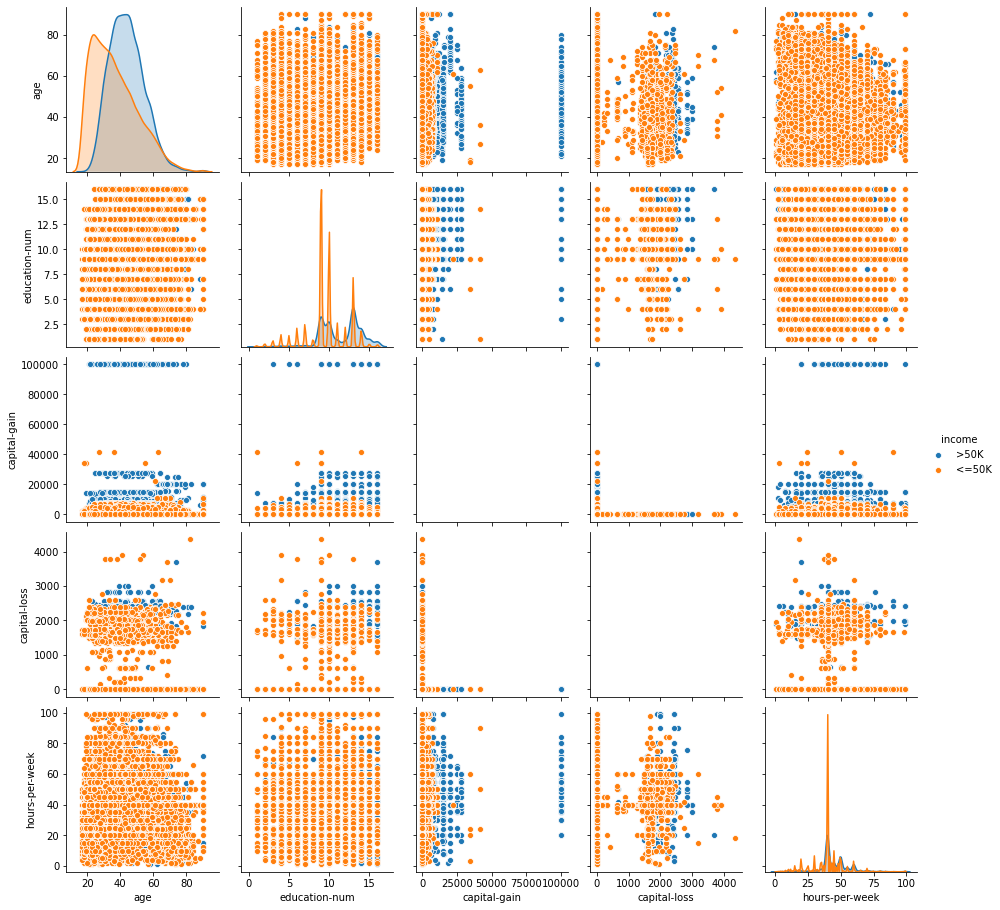

In [344]:
sns.pairplot(df, hue ="income")

Discussion:

- There is a lot of overlapping in the data points. It is a nonlinear data split, so multi-linear correelation will not work, KNN, decison tree, random forest, gradient, and XG boost will be better algorithims.
- Naive Bayer will not be a suitable classifer 

Lets us start with preprcoessing the data now

In [345]:
X

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,28,Private,Masters,14.0,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,45.0,France
1,60,Private,9th,5.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,45.0,United-States
2,43,Private,Some-college,10.0,Never-married,Adm-clerical,Not-in-family,White,Male,0.0,1669.0,45.0,United-States
3,35,State-gov,HS-grad,9.0,Married-civ-spouse,Other-service,Husband,White,Male,0.0,0.0,40.0,United-States
4,36,Private,Some-college,10.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,26,Private,Some-college,10.0,Divorced,Adm-clerical,Not-in-family,White,Female,0.0,0.0,40.0,United-States
45218,24,Private,Bachelors,13.0,Never-married,Sales,Other-relative,Black,Male,0.0,0.0,50.0,United-States
45219,31,Private,Some-college,10.0,Never-married,Adm-clerical,Not-in-family,White,Male,0.0,0.0,40.0,United-States
45220,37,Private,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,99.0,United-States


In [346]:
Y.value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [347]:
Y

0         >50K
1        <=50K
2        <=50K
3        <=50K
4         >50K
         ...  
45217    <=50K
45218    <=50K
45219    <=50K
45220     >50K
45221    <=50K
Name: income, Length: 45222, dtype: object

In [348]:
k = Y.replace(regex='>50K', value=1)
output = k.replace(regex='<=50K', value=0)

In [349]:
output

0        1
1        0
2        0
3        0
4        1
        ..
45217    0
45218    0
45219    0
45220    1
45221    0
Name: income, Length: 45222, dtype: int64

PREPROCESSING

The first step of pre-processing data is handling missing value. We dont have missing values so we can move to the next step of data preprocessing

In [350]:
on_hot_column_2 = X.filter(['workclass' ,'education_level' , 'marital-status' , 'occupation', 'relationship' ,'race' ,'sex' ,'native-country'])


for i in on_hot_column_2:
    print(str(i) + ":  " + str(len(on_hot_column_2[i].unique())))

workclass:  7
education_level:  16
marital-status:  7
occupation:  14
relationship:  6
race:  5
sex:  2
native-country:  41


Since eductaion_level, occupation, and native country have more than 10 unique columns, they will be handled differnetly as compared to the other datasets

In [351]:
pd.get_dummies(on_hot_column_2, drop_first= True)

,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_level_ 11th,education_level_ 12th,education_level_ 1st-4th,education_level_ 5th-6th,education_level_ 7th-8th,education_level_ 9th,education_level_ Assoc-acdm,education_level_ Assoc-voc,education_level_ Bachelors,education_level_ Doctorate,education_level_ HS-grad,education_level_ Masters,education_level_ Preschool,education_level_ Prof-school,education_level_ Some-college,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
45218,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
45219,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0

Creating dummy variables for each categorical column will lead to creation of 89 columns in total just for categroical variables

In [352]:
X.head(2)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,28,Private,Masters,14.0,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,45.0,France
1,60,Private,9th,5.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,45.0,United-States


Lets first figure out which categorical columsn for nominal and which are ordinal

-Nominal - workclass, marital-status , occupation , relationship, sex, native-country

-Ordinal - education_level

Native Country, and Occupation have more than 10 classes so they will be handled different as compared to other nominal values

HANDLING CATEGORICAL VALUES WITH LESS THAN 10 COLUMNS

FIRST CATEGORICAL COLUMN 

In [353]:
workclass_one_hot = pd.get_dummies(X["workclass"], drop_first= True)
workclass_one_hot 

,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,0,0,0,1,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
45217,0,1,0,0,0,0
45218,0,1,0,0,0,0
45219,0,1,0,0,0,0
45220,0,1,0,0,0,0


SECOND CATEGORICAL COLUMN

In [354]:
marital_status_one_hot = pd.get_dummies(X["marital-status"], drop_first= True)
marital_status_one_hot

,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,1,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
45217,0,0,0,0,0,0
45218,0,0,0,1,0,0
45219,0,0,0,1,0,0
45220,0,1,0,0,0,0


THIRD CATEGORICAL COLUMN

In [355]:
relationship_one_hot = pd.get_dummies(X["relationship"], drop_first= True)
relationship_one_hot

,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,0,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
45217,1,0,0,0,0
45218,0,1,0,0,0
45219,1,0,0,0,0
45220,0,0,0,0,0


FOURTH CATEGORICAL COLUMN

In [356]:
race_one_hot = pd.get_dummies(X["race"], drop_first= True)
race_one_hot

,Asian-Pac-Islander,Black,Other,White
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
45217,0,0,0,1
45218,0,1,0,0
45219,0,0,0,1
45220,0,0,0,1


FIFTH CATEGORICAL COLUMN

In [357]:
sex_one_hot = pd.get_dummies(X["sex"], drop_first= True)
sex_one_hot 

,Male
0,1
1,1
2,1
3,1
4,1
...,...
45217,0
45218,1
45219,1
45220,1


SIXTH CATEGORICAL COLUMN

HANDLING CATEGORICAL NOMINAL VALUES WITH MORE THAN 10 COLUMNS



For the native country column, I will perform one hot encoding on top 10 categories and make the remaining 0

In [358]:
X["native-country"].unique()

array([' France', ' United-States', ' Mexico', ' Germany', ' Columbia',
       ' Poland', ' Cuba', ' Puerto-Rico', ' Philippines', ' El-Salvador',
       ' India', ' Thailand', ' Dominican-Republic', ' England', ' Japan',
       ' Haiti', ' Greece', ' Outlying-US(Guam-USVI-etc)', ' Canada',
       ' Vietnam', ' South', ' China', ' Guatemala', ' Honduras', ' Peru',
       ' Ireland', ' Italy', ' Taiwan', ' Iran', ' Nicaragua', ' Hong',
       ' Ecuador', ' Yugoslavia', ' Cambodia', ' Jamaica', ' Portugal',
       ' Scotland', ' Laos', ' Trinadad&Tobago', ' Hungary',
       ' Holand-Netherlands'], dtype=object)

In [359]:
X["native-country"].value_counts().sort_values(ascending = False)

 United-States                 41292
 Mexico                          903
 Philippines                     283
 Germany                         193
 Puerto-Rico                     175
 Canada                          163
 El-Salvador                     147
 India                           147
 Cuba                            133
 England                         119
 China                           113
 Jamaica                         103
 South                           101
 Italy                           100
 Dominican-Republic               97
 Japan                            89
 Guatemala                        86
 Vietnam                          83
 Columbia                         82
 Poland                           81
 Haiti                            69
 Portugal                         62
 Iran                             56
 Taiwan                           55
 Greece                           49
 Nicaragua                        48
 Peru                             45
 

top_10

In [360]:
X["native-country"]

0                France
1         United-States
2         United-States
3         United-States
4         United-States
              ...      
45217     United-States
45218     United-States
45219     United-States
45220     United-States
45221     United-States
Name: native-country, Length: 45222, dtype: object

In [361]:
X["native-country"] = [1 if i == "United-States" else 0 for i in X["native-country"]]

In [362]:
x_native_country_dummy = X["native-country"]

In [363]:
df_x_native_country_dummy= pd.DataFrame(x_native_country_dummy)

In [364]:
X["native-country"].value_counts()

0    45222
Name: native-country, dtype: int64

SEVENTH CATEGORICAL COLUMN

This is nominal encoding.

I will handle Nominal - Occupation with count/frequency encoding

In [365]:
X['occupation'].value_counts()

 Craft-repair         6020
 Prof-specialty       6008
 Exec-managerial      5984
 Adm-clerical         5540
 Sales                5408
 Other-service        4808
 Machine-op-inspct    2970
 Transport-moving     2316
 Handlers-cleaners    2046
 Farming-fishing      1480
 Tech-support         1420
 Protective-serv       976
 Priv-house-serv       232
 Armed-Forces           14
Name: occupation, dtype: int64

In [366]:
#lets try to obtain teh count  for each one of the labels in variable x2
#lets capture this in a dictionary that we can use to re-map the labels
#X_train['occupation'].value_counts().to_dict()
X_occupation_map =  X.occupation.value_counts().to_dict()
X_occupation_map

{' Craft-repair': 6020,
 ' Prof-specialty': 6008,
 ' Exec-managerial': 5984,
 ' Adm-clerical': 5540,
 ' Sales': 5408,
 ' Other-service': 4808,
 ' Machine-op-inspct': 2970,
 ' Transport-moving': 2316,
 ' Handlers-cleaners': 2046,
 ' Farming-fishing': 1480,
 ' Tech-support': 1420,
 ' Protective-serv': 976,
 ' Priv-house-serv': 232,
 ' Armed-Forces': 14}

In [367]:
# and now we replace x2 labels in the dataset df

X_occupation = X.occupation.map(X_occupation_map)

X_occupation

0        5408
1        1480
2        5540
3        4808
4        6020
         ... 
45217    5540
45218    5408
45219    5540
45220    6020
45221    4808
Name: occupation, Length: 45222, dtype: int64

In [368]:
df_X_occupation = pd.DataFrame(X_occupation)

I will not be handling education level as it already education-num column.

CONCATANATION of ONE-HOT ENCODNG columns and numerical values

In [369]:
concatenated_X=np.concatenate((sex_one_hot, race_one_hot, relationship_one_hot,marital_status_one_hot,workclass_one_hot,df_x_native_country_dummy,df_X_occupation,X), axis=1)# concanate columns together
#Oil_Prod_im_Std is just created above
concatenated_X[0:4]

array([[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 5408, 28, ' Private', ' Masters', 14.0, ' Married-civ-spouse',
        ' Sales', ' Husband', ' White', ' Male', 0.0, 0.0, 45.0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 1480, 60, ' Private', ' 9th', 5.0, ' Married-civ-spouse',
        ' Farming-fishing', ' Husband', ' White', ' Male', 0.0, 0.0,
        45.0, 0],
       [1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 5540, 43, ' Private', ' Some-college', 10.0, ' Never-married',
        ' Adm-clerical', ' Not-in-family', ' White', ' Male', 0.0,
        1669.0, 45.0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 4808, 35, ' State-gov', ' HS-grad', 9.0,
        ' Married-civ-spouse', ' Other-service', ' Husband', ' White',
        ' Male', 0.0, 0.0, 40.0, 0]], dtype=object)

In [370]:
pd.set_option("display.max_columns", 455)
df_new = pd.DataFrame(concatenated_X)
df_new 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,5408,28,Private,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,0
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1480,60,Private,9th,5,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,45,0
2,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,5540,43,Private,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Male,0,1669,45,0
3,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,4808,35,State-gov,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,0
4,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,6020,36,Private,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,5540,26,Private,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,0
45218,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,5408,24,Private,Bachelors,13,Never-married,Sales,Other-relative,Black,Male,0,0,50,0
45219,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,5540,31,Private,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,40,0
45220,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,6020,37,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,99,0


In [ ]:
Here

Col 0 - Sex
Col 1 to Col 4 (inc) -  Race namely - Asian-Pac-Islander	Black	Other	White
Col 5 to Col 9 (inc) -  relationship namely - Not-in-family	Other-relative	Own-child	Unmarried	Wife
Col 10 to Col 15 (inc) - marital_status - Married-AF-spouse	Married-civ-spouse	Married-spouse-absent	Never-married	Separated	Widowed
Col 16 to Col 21 (inc) - workclass - Local-gov	Private	Self-emp-inc	Self-emp-not-inc	State-gov	Without-pay
Col 22 - native country
Col 23 - occupation
Col 24 - age 
Col 25 to Col 26 - workclass	education_level - categorical - delete
Col 27 - education to number already done
Col 28 to Col 32 (incuded) - marital-status	occupation	relationship	race	sex , so delete
Col 33 to Col 35 (incuded) - capital-gain	capital-loss	hours-per-week 
Col 36 - not needed - so delete

In [371]:
cols = [25,26,28,29,30,31,32,36]
df_new.drop(df_new.columns[cols],axis=1,inplace=True)

In [372]:
df_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,27,33,34,35
0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,5408,28,14,0,0,45
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1480,60,5,0,0,45
2,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,5540,43,10,0,1669,45
3,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,4808,35,9,0,0,40
4,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,6020,36,10,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,5540,26,10,0,0,40
45218,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,5408,24,13,0,0,50
45219,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,5540,31,10,0,0,40
45220,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,6020,37,9,0,0,99


In [ ]:
I tried various techniques to handle cateorical data includig knn orange.

SCALING THE DATASET

We can talk use data normalization as well data standardization to handle this data scaling.

We will use feature scaling since we wil be using KNN  to handle the dataset

In my opinion data scaling works very well when standardization works better than normalziation or min_max scaling 



In [373]:
from sklearn.preprocessing import StandardScaler

In [374]:
scaler = StandardScaler()
scaler.fit(df_new)

StandardScaler()

In [375]:
scaled_data = scaler.transform(df_new)
scaled_data

array([[ 0.69381348, -0.17224475, -0.32114957, ..., -0.1467332 ,
        -0.21878026,  0.33829067],
       [ 0.69381348, -0.17224475, -0.32114957, ..., -0.1467332 ,
        -0.21878026,  0.33829067],
       [ 0.69381348, -0.17224475, -0.32114957, ..., -0.1467332 ,
         3.90269979,  0.33829067],
       ...,
       [ 0.69381348, -0.17224475, -0.32114957, ..., -0.1467332 ,
        -0.21878026, -0.07812006],
       [ 0.69381348, -0.17224475, -0.32114957, ..., -0.1467332 ,
        -0.21878026,  4.83552657],
       [-1.44130956, -0.17224475, -0.32114957, ..., -0.1467332 ,
        -0.21878026, -0.07812006]])

In [376]:
dataframe_scaled_data = pd.DataFrame(scaled_data)
dataframe_scaled_data 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,0.693813,-0.172245,-0.321150,-0.088698,0.403026,-0.590851,-0.175351,-0.414338,-0.344115,-0.220182,-0.026611,1.071356,-0.111163,-0.690424,-0.179462,-0.170467,-0.271285,0.598108,-0.194353,-0.302710,-0.212055,-0.021554,0.0,0.399646,-0.798015,1.520471,-0.146733,-0.21878,0.338291
1,0.693813,-0.172245,-0.321150,-0.088698,0.403026,-0.590851,-0.175351,-0.414338,-0.344115,-0.220182,-0.026611,1.071356,-0.111163,-0.690424,-0.179462,-0.170467,-0.271285,0.598108,-0.194353,-0.302710,-0.212055,-0.021554,0.0,-1.984435,1.622977,-2.004996,-0.146733,-0.21878,0.338291
2,0.693813,-0.172245,-0.321150,-0.088698,0.403026,1.692474,-0.175351,-0.414338,-0.344115,-0.220182,-0.026611,-0.933397,-0.111163,1.448386,-0.179462,-0.170467,-0.271285,0.598108,-0.194353,-0.302710,-0.212055,-0.021554,0.0,0.479763,0.336825,-0.046403,-0.146733,3.90270,0.338291
3,0.693813,-0.172245,-0.321150,-0.088698,0.403026,-0.590851,-0.175351,-0.414338,-0.344115,-0.220182,-0.026611,1.071356,-0.111163,-0.690424,-0.179462,-0.170467,-0.271285,-1.671940,-0.194353,-0.302710,4.715765,-0.021554,0.0,0.035479,-0.268423,-0.438122,-0.146733,-0.21878,-0.078120
4,0.693813,-0.172245,-0.321150,-0.088698,0.403026,-0.590851,-0.175351,-0.414338,-0.344115,-0.220182,-0.026611,1.071356,-0.111163,-0.690424,-0.179462,-0.170467,-0.271285,0.598108,-0.194353,-0.302710,-0.212055,-0.021554,0.0,0.771097,-0.192767,-0.046403,-0.146733,-0.21878,-0.078120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,-1.441310,-0.172245,-0.321150,-0.088698,0.403026,1.692474,-0.175351,-0.414338,-0.344115,-0.220182,-0.026611,-0.933397,-0.111163,-0.690424,-0.179462,-0.170467,-0.271285,0.598108,-0.194353,-0.302710,-0.212055,-0.021554,0.0,0.479763,-0.949327,-0.046403,-0.146733,-0.21878,-0.078120
45218,0.693813,-0.172245,3.113814,-0.088698,-2.481232,-0.590851,5.702860,-0.414338,-0.344115,-0.220182,-0.026611,-0.933397,-0.111163,1.448386,-0.179462,-0.170467,-0.271285,0.598108,-0.194353,-0.302710,-0.212055,-0.021554,0.0,0.399646,-1.100639,1.128753,-0.146733,-0.21878,0.754701
45219,0.693813,-0.172245,-0.321150,-0.088698,0.403026,1.692474,-0.175351,-0.414338,-0.344115,-0.220182,-0.026611,-0.933397,-0.111163,1.448386,-0.179462,-0.170467,-0.271285,0.598108,-0.194353,-0.302710,-0.212055,-0.021554,0.0,0.479763,-0.571047,-0.046403,-0.146733,-0.21878,-0.078120
45220,0.693813,-0.172245,-0.321150,-0.088698,0.403026,-0.590851,-0.175351,-0.414338,-0.344115,-0.220182,-0.026611,1.071356,-0.111163,-0.690424,-0.179462,-0.170467,-0.271285,0.598108,-0.194353,-0.302710,-0.212055,-0.021554,0.0,0.771097,-0.117111,-0.438122,-0.146733,-0.21878,4.835527


DRAW THE BOXPLOT

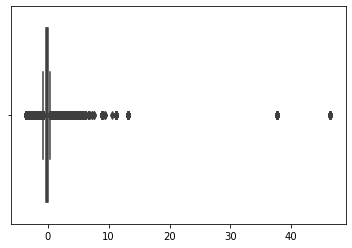

In [377]:

sns.boxplot(dataframe_scaled_data )

REMOVING THE OUTLIERS

In [378]:
def outlier_remove(df, n,name):
    """Delete rows for a specified column where values are out of +/- n*sd standard deviations
    df  : Pandas dataframe
    n   : n in the equation 𝑚±𝑛𝜎
    name: Column name
    """
    mean=df[name].mean() # Calclute mean of column
    sd=df[name].std()    # Calclute standard deviation of column
    drop_r = df.index[(mean -n * sd> df[name]) | (mean+n * sd< df[name])]# vertical line is or
    df.drop(drop_r, axis=0, inplace=True)# dropping rows that dont satisfy the code
    df.reset_index(inplace=True, drop=True) # Reset index



In [379]:
# Drop outliers in last column 'OIL Prod. (e3m3/month)'
new_df_2 = outlier_remove(dataframe_scaled_data, n=2.5,name=0) #based on oil production


In [380]:
dataframe_scaled_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
count,4.522200e+04,4.522200e+04,4.522200e+04,4.522200e+04,4.522200e+04,4.522200e+04,4.522200e+04,4.522200e+04,4.522200e+04,4.522200e+04,4.522200e+04,4.522200e+04,4.522200e+04,4.522200e+04,4.522200e+04,4.522200e+04,4.522200e+04,4.522200e+04,4.522200e+04,4.522200e+04,4.522200e+04,4.522200e+04,45222.0,4.522200e+04,4.522200e+04,4.522200e+04,4.522200e+04,4.522200e+04,4.522200e+04
mean,-1.893571e-15,5.961538e-16,-4.889233e-17,3.688959e-16,-8.042010e-17,-1.763743e-15,-3.419014e-16,-8.309856e-17,3.602517e-16,2.534575e-15,-4.850476e-16,-2.654391e-15,3.803174e-15,-4.746350e-16,-7.391814e-16,-6.337799e-16,6.315863e-16,-2.008968e-16,1.162858e-15,-9.720626e-16,4.673447e-16,4.264110e-16,0.0,1.560369e-17,-4.924832e-17,4.407553e-16,3.607199e-15,1.268303e-15,9.147813e-16
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,0.0,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-1.441310e+00,-1.722447e-01,-3.211496e-01,-8.869807e-02,-2.481232e+00,-5.908511e-01,-1.753506e-01,-4.143378e-01,-3.441151e-01,-2.201822e-01,-2.661055e-02,-9.333967e-01,-1.111633e-01,-6.904237e-01,-1.794618e-01,-1.704672e-01,-2.712854e-01,-1.671940e+00,-1.943530e-01,-3.027099e-01,-2.120547e-01,-2.155438e-02,0.0,-2.874217e+00,-1.630231e+00,-3.571870e+00,-1.467332e-01,-2.187803e-01,-3.326124e+00
25%,-1.441310e+00,-1.722447e-01,-3.211496e-01,-8.869807e-02,4.030256e-01,-5.908511e-01,-1.753506e-01,-4.143378e-01,-3.441151e-01,-2.201822e-01,-2.661055e-02,-9.333967e-01,-1.111633e-01,-6.904237e-01,-1.794618e-01,-1.704672e-01,-2.712854e-01,-1.671940e+00,-1.943530e-01,-3.027099e-01,-2.120547e-01,-2.155438e-02,0.0,-1.080087e+00,-7.980149e-01,-4.381216e-01,-1.467332e-01,-2.187803e-01,-7.812006e-02
50%,6.938135e-01,-1.722447e-01,-3.211496e-01,-8.869807e-02,4.030256e-01,-5.908511e-01,-1.753506e-01,-4.143378e-01,-3.441151e-01,-2.201822e-01,-2.661055e-02,-9.333967e-01,-1.111633e-01,-6.904237e-01,-1.794618e-01,-1.704672e-01,-2.712854e-01,5.981075e-01,-1.943530e-01,-3.027099e-01,-2.120547e-01,-2.155438e-02,0.0,4.797632e-01,-1.171110e-01,-4.640300e-02,-1.467332e-01,-2.187803e-01,-7.812006e-02
75%,6.938135e-01,-1.722447e-01,-3.211496e-01,-8.869807e-02,4.030256e-01,1.692474e+00,-1.753506e-01,-4.143378e-01,-3.441151e-01,-2.201822e-01,-2.661055e-02,1.071356e+00,-1.111633e-01,1.448386e+00,-1.794618e-01,-1.704672e-01,-2.712854e-01,5.981075e-01,-1.943530e-01,-3.027099e-01,-2.120547e-01,-2.155438e-02,0.0,7.638136e-01,6.394489e-01,1.128753e+00,-1.467332e-01,-2.187803e-01,3.382907e-01
max,6.938135e-01,5.805692e+00,3.113814e+00,1.127420e+01,4.030256e-01,1.692474e+00,5.702860e+00,2.413490e+00,2.906005e+00,4.541693e+00,3.757908e+01,1.071356e+00,8.995772e+00,1.448386e+00,5.572218e+00,5.866233e+00,3.686155e+00,5.981075e-01,5.145277e+00,3.303493e+00,4.715765e+00,4.639427e+01,0.0,7.710970e-01,3.892656e+00,2.303909e+00,1.317519e+01,1.053806e+01,4.835527e+00


There are not any values above sd > 2.5, so no outliers have been removed.

FEATURE ENGINEERING

In [381]:
from sklearn.decomposition import PCA

In [382]:
pca = PCA(n_components=10)

In [383]:
pca.fit(dataframe_scaled_data)

PCA(n_components=10)

In [384]:
x_pca = pca.transform(dataframe_scaled_data)

In [385]:
dataframe_scaled_data.shape

(45222, 29)

In [386]:
x_pca.shape

(45222, 10)

In [387]:
output

0        1
1        0
2        0
3        0
4        1
        ..
45217    0
45218    0
45219    0
45220    1
45221    0
Name: income, Length: 45222, dtype: int64

In [388]:
output.shape

(45222,)

In [389]:
output.value_counts()

0    34014
1    11208
Name: income, dtype: int64

We are sufeering from a imbalance dataset problem. That can be improved further.

In [390]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(x_pca,output, test_size = 0.15)

In [391]:
y_train

21307    0
32294    0
29942    1
37554    0
24391    0
        ..
36694    0
26904    1
24123    0
17790    0
29509    1
Name: income, Length: 38438, dtype: int64

In [392]:
X_train

array([[-3.54452158e+00,  1.87188209e+00, -2.88685201e+00, ...,
         9.40339194e-01,  5.47310327e-03,  1.09995042e+00],
       [-3.67746562e+00,  1.47796268e+00, -1.66602352e+00, ...,
        -3.87635824e-01, -8.23099534e-01,  2.83510454e-01],
       [ 1.77915590e+00, -2.68330175e-01,  2.12713382e-02, ...,
         5.24703725e-02, -6.27231038e-03, -2.65740979e-01],
       ...,
       [-1.86165261e+00, -6.23090946e-01,  1.83826729e+00, ...,
        -3.24528759e-03, -2.35305125e-02,  2.34127168e-01],
       [ 1.11775277e+00,  2.73548992e+00,  2.83736012e+00, ...,
         3.60070180e+00, -1.54957342e+00, -8.56014263e-01],
       [ 1.58415599e+00, -7.91506892e-01, -9.30122327e-01, ...,
        -1.11996245e-01, -2.17421453e-02,  1.29092536e-01]])

VISUALIZING THE DATA A BIT

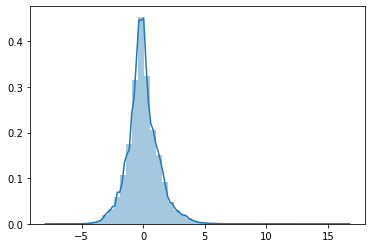

In [394]:
sns.distplot(X_train)

Its centered around the mean of 0 and has a sd of 1 

In [395]:
y_train.value_counts()

0    28877
1     9561
Name: income, dtype: int64

We are suffering from a imbalanced dataset problem.

We will use three models here

KNeighborsClassifier

In [396]:
from sklearn.neighbors import KNeighborsClassifier

In [420]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighbors_accuracies=cross_val_score(knn,X_train,y_train, cv=5, scoring="accuracy")

np.mean( KNeighbors_accuracies)

0.8277747631818088

In [421]:
pred = knn.predict(X_test)

Predictions and Evaluations

Let's evaluate our KNN model!

In [422]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [423]:
print(confusion_matrix(y_test,pred))

[[4606  531]
 [ 666  981]]


In [424]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      5137
           1       0.65      0.60      0.62      1647

    accuracy                           0.82      6784
   macro avg       0.76      0.75      0.75      6784
weighted avg       0.82      0.82      0.82      6784



Here we see that the weighted average accuracy is 

In this case I beleive that precison is an important metric as compared to recall, since we want to limit the number of false positives.
So we will be evaluating the performance of our model based on these three metrics

- f1 score 
- accuracy
- precision

Choosing a K value

In [404]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train,y_train,cv=10)
    accuracy_rate.append(score.mean())

In [405]:
error_rate = []
# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

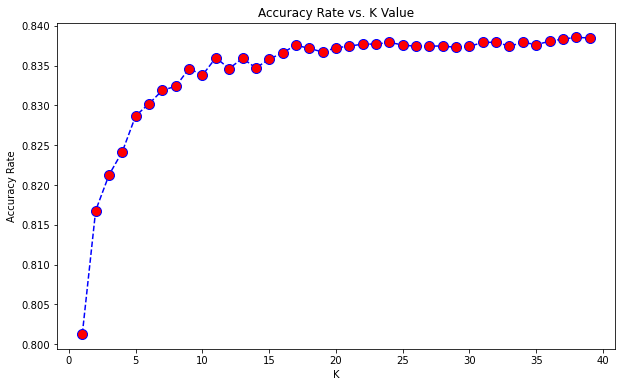

In [406]:
plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
  #       markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
plt.show()


Here we can see that that after arouns K>17 the accuracy rate just tends to hover around 0.835-0.85 Let's retrain the model with that and check the classification report!

In [407]:

# NOW WITH K=17
knn = KNeighborsClassifier(n_neighbors=17, metric='euclidean')

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=17')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=17


[[4698  439]
 [ 674  973]]


              precision    recall  f1-score   support

           0       0.87      0.91      0.89      5137
           1       0.69      0.59      0.64      1647

    accuracy                           0.84      6784
   macro avg       0.78      0.75      0.77      6784
weighted avg       0.83      0.84      0.83      6784



In [ ]:
K=17 is best parameter.

METHOD 2

In [408]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint
np.random.seed(42)
model = KNeighborsClassifier()
import warnings
warnings.filterwarnings('ignore')

param_grid = [{
'n_neighbors': randint(low=1, high=40),'metric': ['euclidean', 'mahattan' ]
               }]
gs = RandomizedSearchCV(model,param_grid,cv=5, n_iter = 30, scoring="accuracy", random_state =42)
gs.fit(X_train, y_train)
gs.best_params_


{'metric': 'euclidean', 'n_neighbors': 36}

In [416]:
clf = KNeighborsClassifier(n_neighbors=36, metric='euclidean')
clf.fit(X_train,y_train)

KNeighbors_accuracies=cross_val_score(clf,X_train,y_train, cv=5, scoring="accuracy")

np.mean( KNeighbors_accuracies)

0.8374006948769678

In [417]:
KNeighbors_precision=cross_val_score(clf,X_train,y_train, cv=5, scoring="precision")

np.mean( KNeighbors_precision)

0.7272834936318668

In [418]:
KNeighbors_f1=cross_val_score(clf,X_train,y_train, cv=5, scoring="f1")

np.mean( KNeighbors_f1)

0.62931745993745

In [ ]:
We are getting a f1 score is 0.63 abd a accuracy of 0.84

In [ ]:
Other Resources:

In [ ]:
https://www.kaggle.com/erfansultan/handling-missing-values#Target-Guided-Ordinal-Encoding